In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import datetime
from glob import glob
from collections import Counter

import pandas as pd
from memeorandum import lead_stories

In [3]:
for date in pd.date_range('2018-06-19', '2019-07-01'):
    outfile = 'data/{}.csv'.format(date.date().isoformat())
    if not os.path.exists(outfile):
        lead_stories(date).to_csv(outfile, encoding='utf8')

In [4]:
stories = pd.concat(pd.read_csv(f, index_col=0, parse_dates=['date']) for f in glob('data/*.csv')).set_index('date')

In [5]:
stories['aoc'] = stories['headline'].map(lambda x: 1 if 'ocasio-cortez' in x.lower() or 'aoc' in x.lower() else 0)

In [6]:
stories[stories['aoc'] == 1].sample(5)

,rank,author,publication,headline,url,aoc
date,,,,,,
2018-11-24,17,Heather Caygle,Politico,It's not just Ocasio-Cortez: Here are 7 freshm...,http://www.politico.com/story/2018/11/24/congr...,1
2018-11-18,17,Alex Thompson,Politico,Ocasio-Cortez backs campaign to primary fellow...,http://www.politico.com/story/2018/11/17/ocasi...,1
2019-01-22,9,New York Times,New York Times,Alexandria Ocasio-Cortez's Tax Hike Idea Is No...,http://www.nytimes.com/2019/01/22/opinion/ocas...,1
2019-02-27,10,Greg P.,twitchy.com,Alexandria Ocasio-Cortez is furious at these p...,http://twitchy.com/gregp-3534/2019/02/27/alexa...,1
2019-01-12,11,Laura Bassett,HuffPost,Conservative Men Are Obsessed With Alexandria ...,http://www.huffingtonpost.com/entry/conservati...,1


In [7]:
weekly = stories.resample('W').agg({'headline': 'count',
                                         'aoc': sum})

daily = stories.resample('D').agg({'headline': 'count',
                                         'aoc': sum})

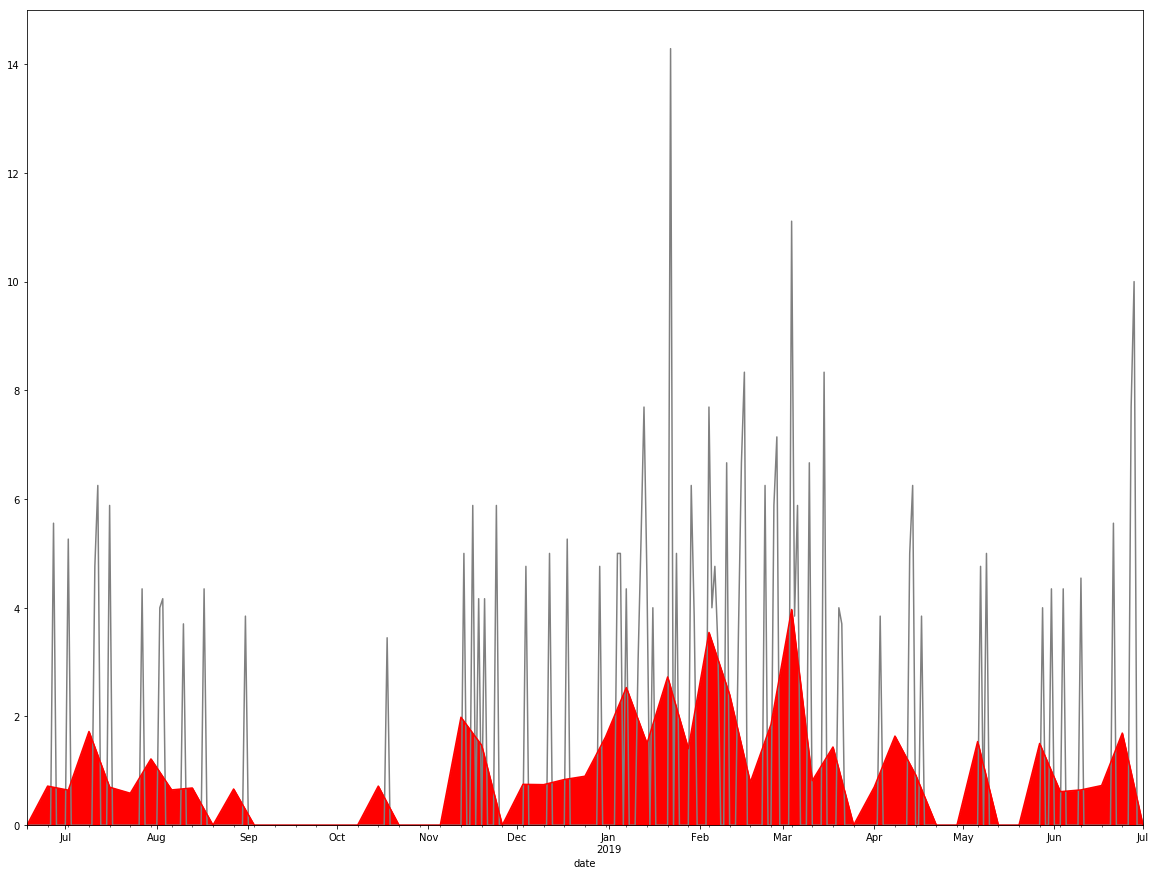

In [8]:
plt.figure(figsize=(20, 15))

(100 * daily['aoc'] / daily['headline']).plot(kind='line', color='gray')
(100 * weekly['aoc'] / weekly['headline']).plot(kind='area', color='red')

In [9]:
aoc_rank = stories[stories['aoc'] == 1].resample('M').agg({'rank': ['min', 'median']})

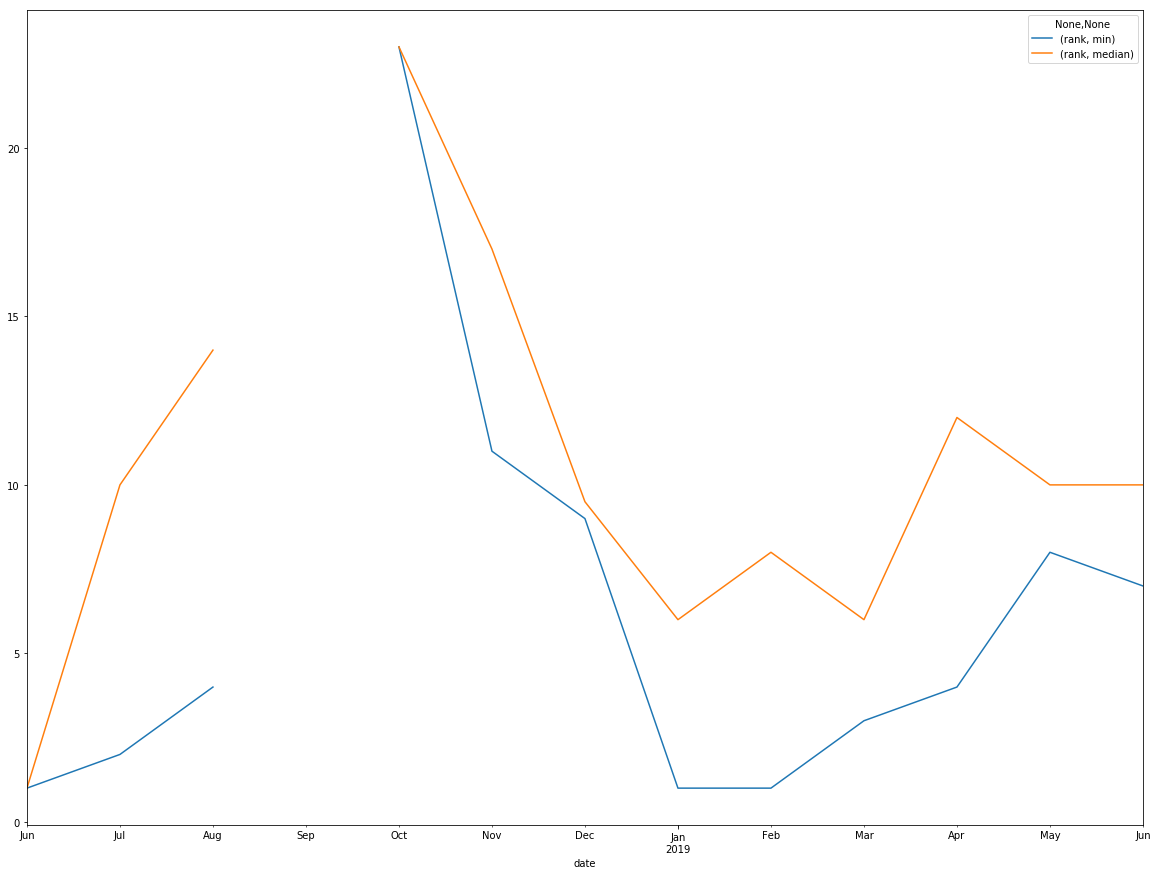

In [10]:
aoc_rank.plot(figsize=(20, 15))

In [11]:
pd.DataFrame(Counter(stories[stories['aoc'] == 1]['publication']).most_common())

,0,1
0,Washington Post,7
1,Politico,5
2,New York Times,4
3,The Intercept,4
4,Fox News,4
5,New York Daily News,2
6,Vox,2
7,Grabien News,2
8,Axios,2
9,New Yorker,2
